In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")

from utils import quick_load_liuzhong_health_check_data
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## CBC overview

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 10.79it/s]


len                                                  mean  \
month            1     2     3     4     5     6    11    12           1   
period                                                                     
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009    4.628322   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008    4.613233   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008    4.564469   
Control-2021  1698  3969  3078  2834  3825  2602  2215  1009  246.142815   
Control-2022  1695  3976  3078  2834  3830  2607  2213  1008  249.390265   
Test-2023     1695  3968  3074  2832  3827  2606  2212  1008  254.106785   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009    5.937135   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008    6.036012   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008    6.072067   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009  137.992049   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008  137.713569   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008  135.375295   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009   41.653210   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008   41.596696   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008   41.328715   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009   90.206979   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008   90.384130   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008   90.753302   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009   29.876649   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008   29.918791   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008   29.730307   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009  330.982627   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008  330.807965   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008  327.371167   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009   12.632332   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008   12.630855   
Test-2023     1696  3968  3075  2834  3829  2607  2212  1008   12.939947   
Control-2021  1685  3930  3054  2819  3794  2576  2198  1004   10.819585   
Control-2022  1679  3945  3054  2819  3814  2594  2199  1005   10.791483   
Test-2023     1681  3940  3054  2820  3815  2592  2202  1005   10.521356   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009    3.327329   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008    3.269248   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008    3.376763   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009    2.047344   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008    2.187142   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008    2.123588   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009    0.407444   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008    0.416024   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008    0.410861   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009    0.034311   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008    0.033823   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008    0.031347   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009    0.121399   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008    0.129575   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008    0.129511   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009   55.164723   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008   53.493982   
Test-2023     1696  3969  3075  2834  3829  2607  2212  1008   54.990684   
Control-2021  1698  3969  3078  2836  3827  2604  2215  1009   35.220819   
Control-2022  1695  3976  3078  2834  3830  2608  2214  1008   

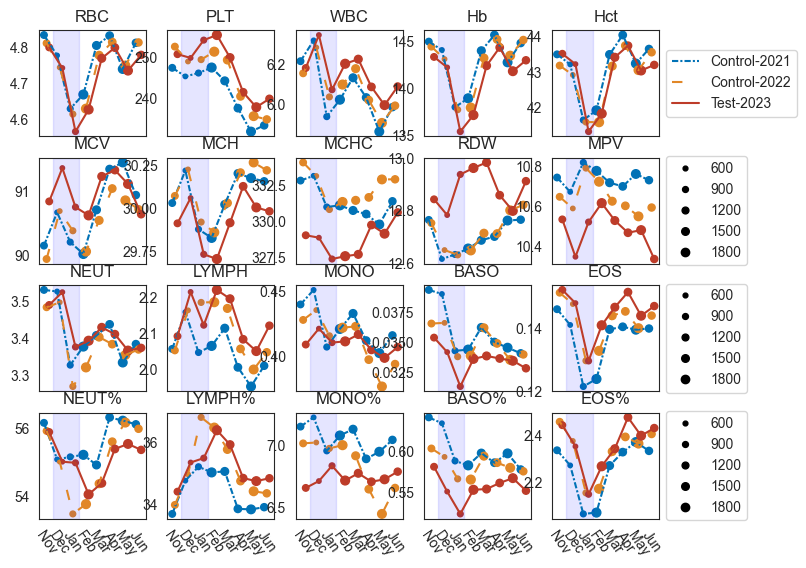

In [2]:
l_tags = list(df_meta_group[df_meta_group["combined_item_name_en"]=="CBC"]["item_id"])
l_tags = [
    'v9057','v9064','v9045','v9058','v9059',
    'v9060','v9061','v9062','v9063','v9065',
    'v9051','v9055','v9089','v9091','v9090',
    'v9046','v9047','v9048','v9049','v9050',
]
l_months = [11,12,1,2,3,4,5,6]

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)

fig, df_res = plt_scatter.plot_scatter(df_table1plus_3p_revMM, l_tags, order=l_months)
fig.savefig(f"{workdir}/Figure5_A.pdf")
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure5_scatter.pdf")
df_res

## RDW Scatter for different ages

RDW


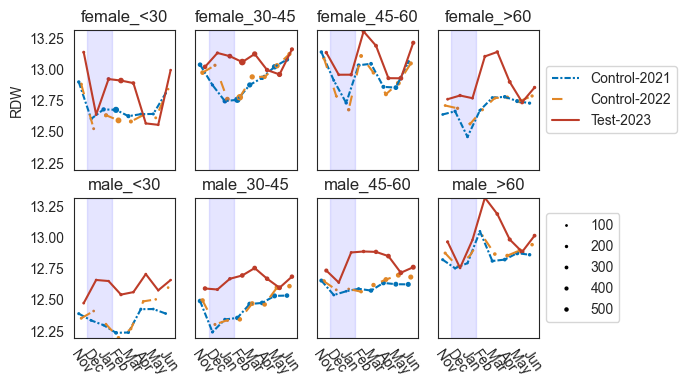

In [3]:
tag = l_tags[8]
print(rename_dict[tag])
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.show()
fig.savefig(f"{workdir}/FigureS5_A.pdf")
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure5_Lung-Scatter-3periods.pdf")

## boxplot_pvalue for RDW

,item_id,gender,age_group,month,period,n,fold_change,log10_p
0,v9063,female,<30,11,2021-2022,175,0.998593,0.043957
1,v9063,female,<30,11,2022-2023,138,1.019872,0.911758
2,v9063,female,30-45,11,2021-2022,526,0.995111,0.326065
3,v9063,female,30-45,11,2022-2023,534,1.003559,0.234638
4,v9063,female,45-60,11,2021-2022,217,0.996347,0.135097
...,...,...,...,...,...,...,...,...
59,v9063,male,30-45,6,2022-2023,488,1.006051,0.862440
60,v9063,male,45-60,6,2021-2022,683,1.004634,0.905439
61,v9063,male,45-60,6,2022-2023,688,1.006219,1.559281
62,v9063,male,>60,6,2021-2022,228,1.006278,0.436521


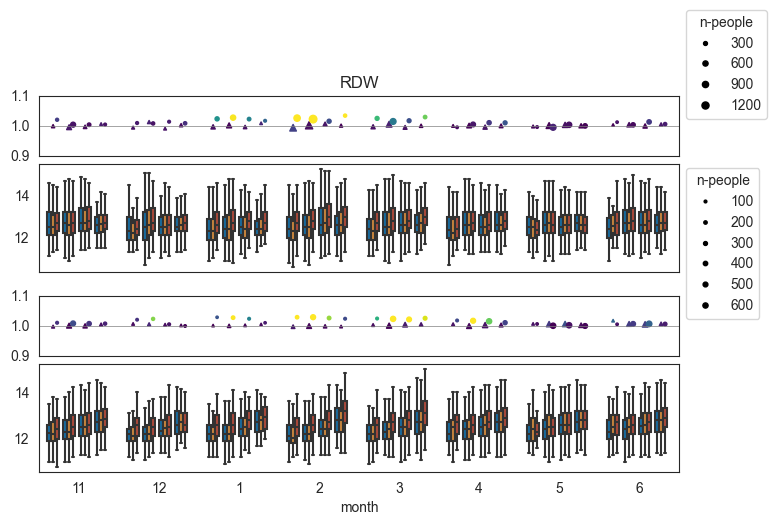

In [4]:
plot_box = BxxPvalue(figsize=(8,4), rename_dict=rename_dict)

fig, df_res = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
)
fig.savefig(f"{workdir}/Figure5_D.pdf")
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure5_RDW-boxplot.pdf")
df_res

## Other plots

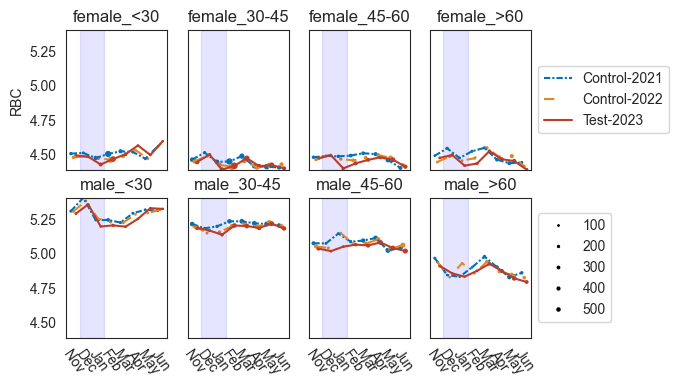

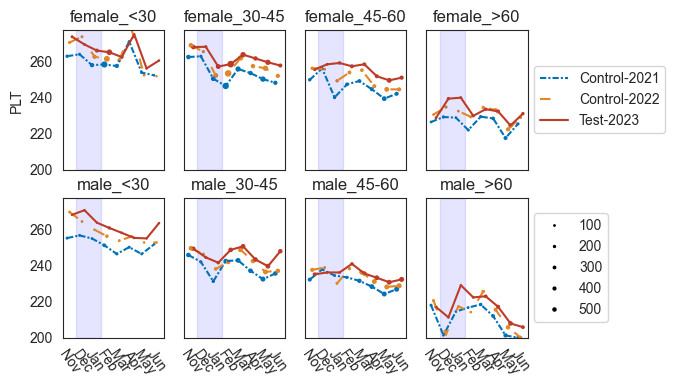

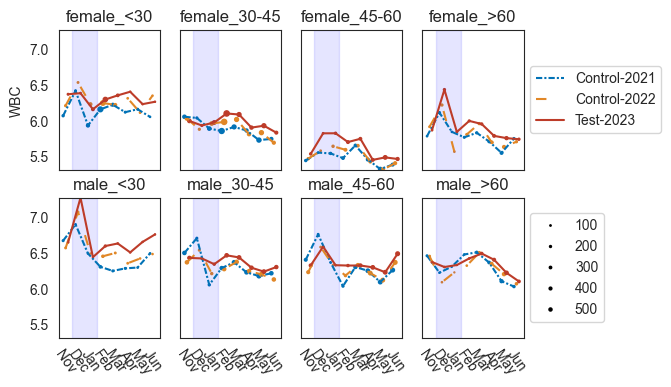

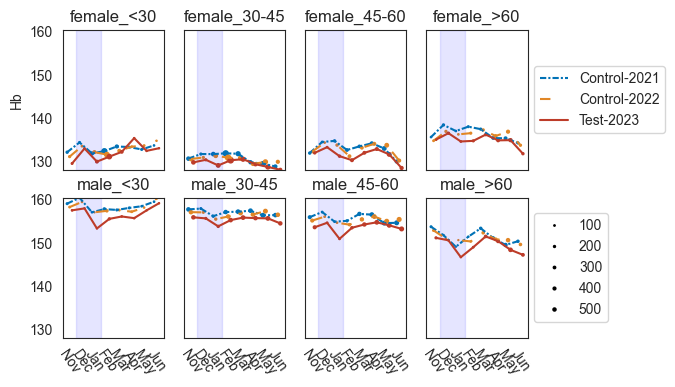

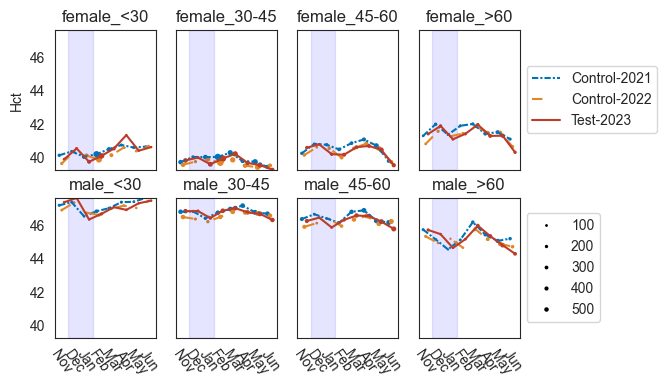

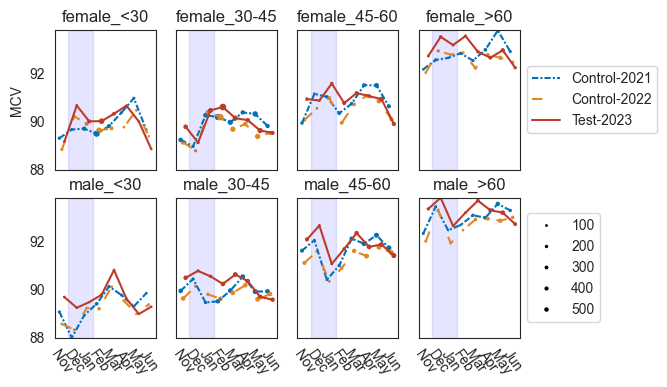

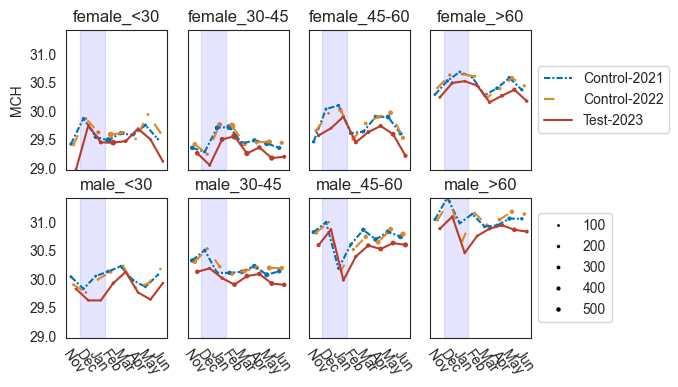

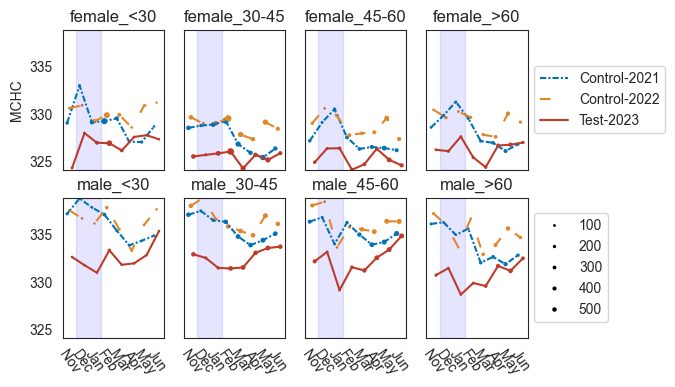

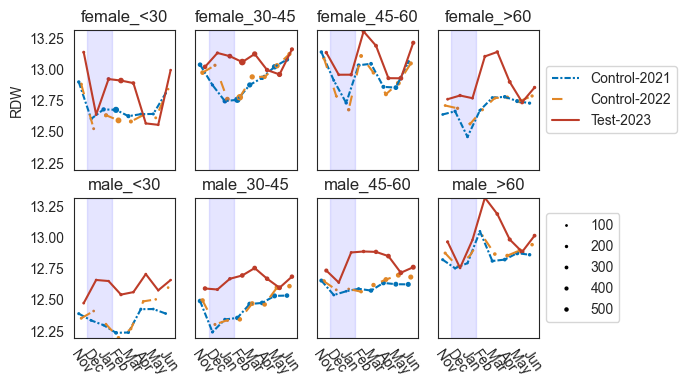

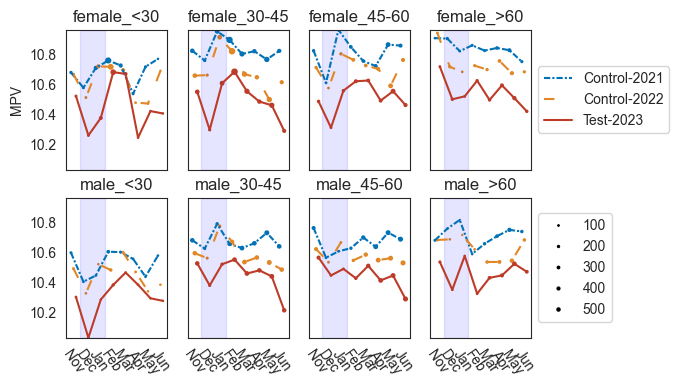

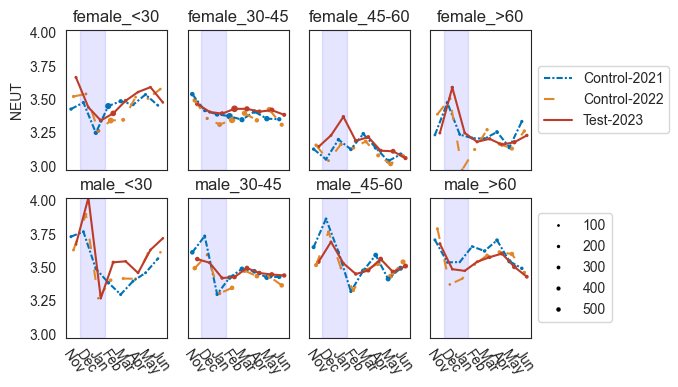

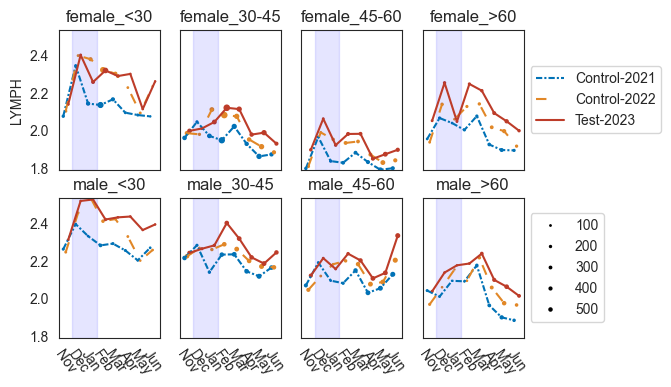

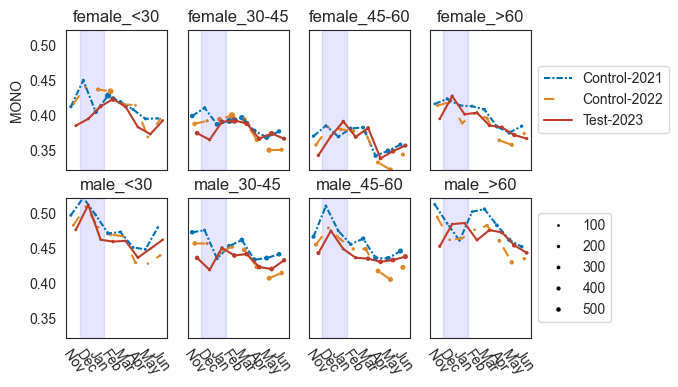

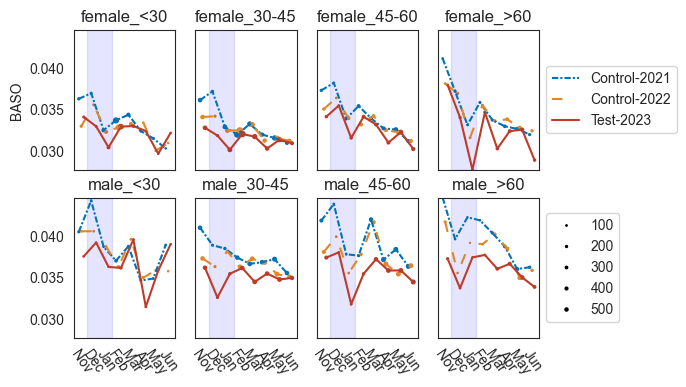

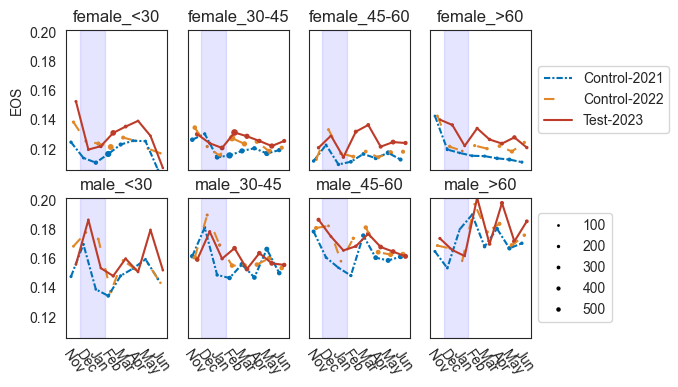

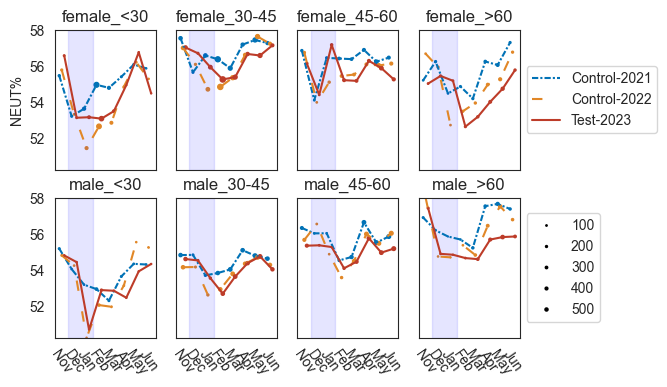

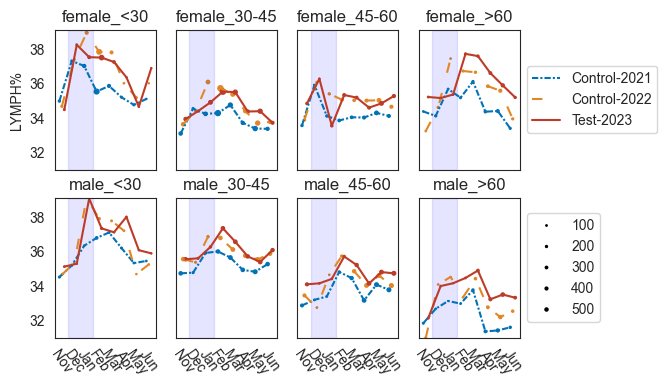

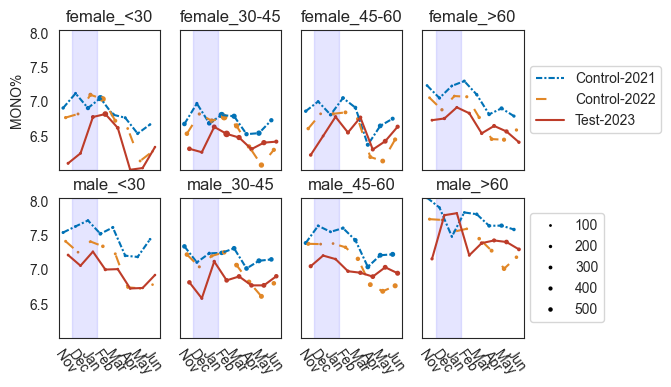

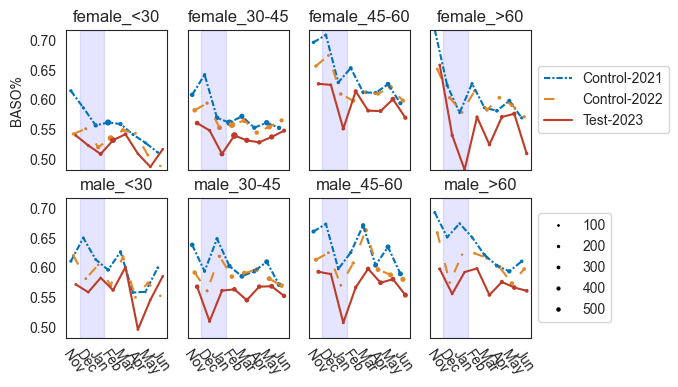

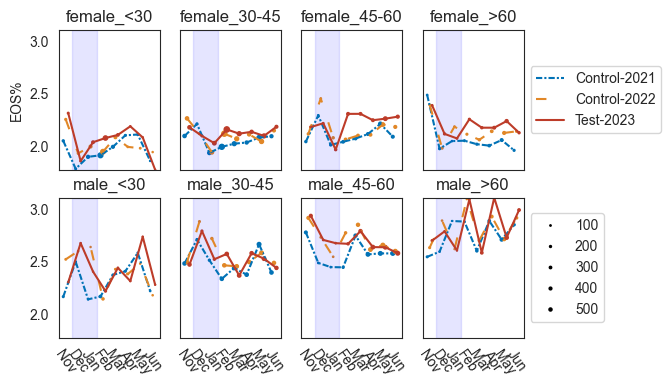

In [5]:
for tag in l_tags:
    plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
# fig.show()
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure5_Lung-Scatter-3periods.pdf")

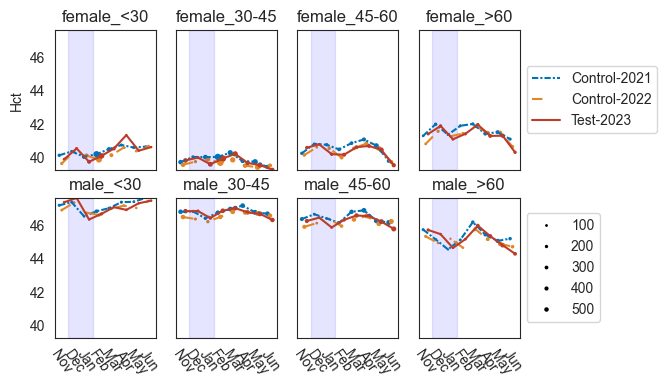

In [6]:
tag = "v9059"
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


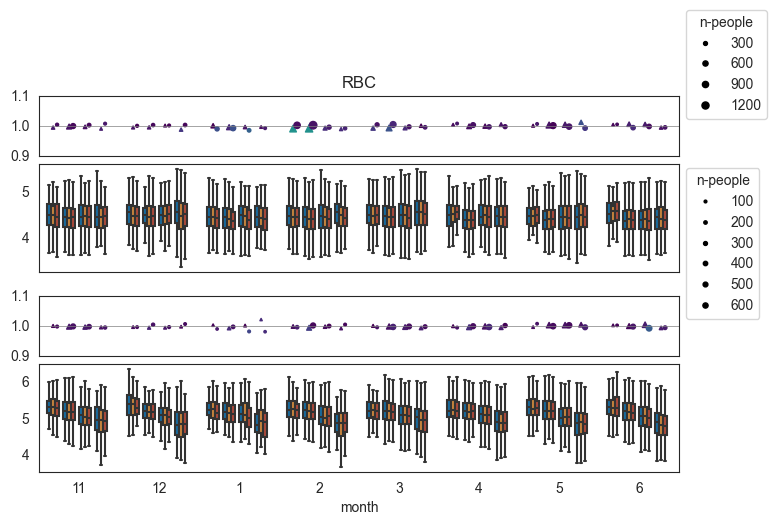

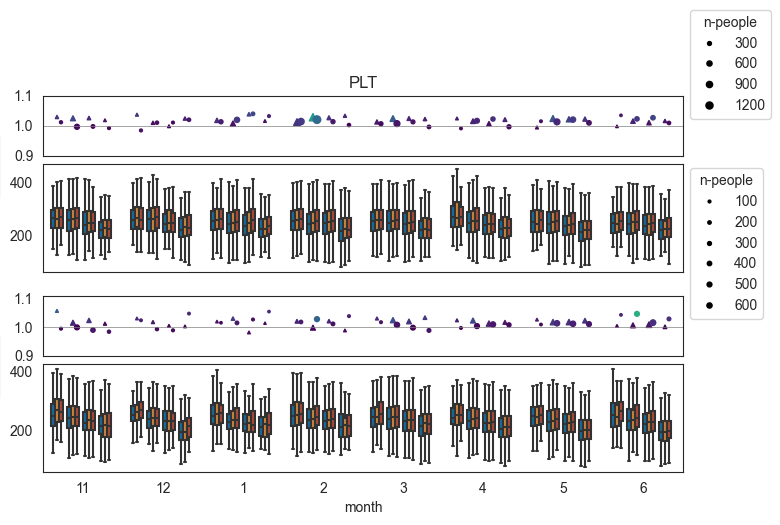

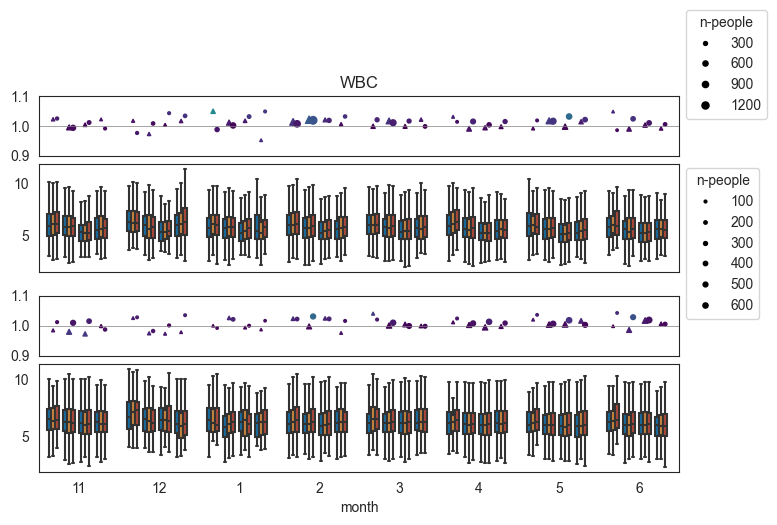

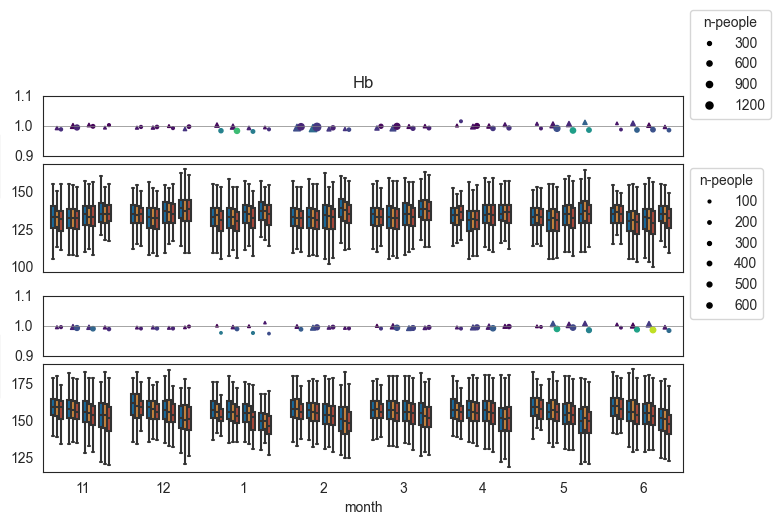

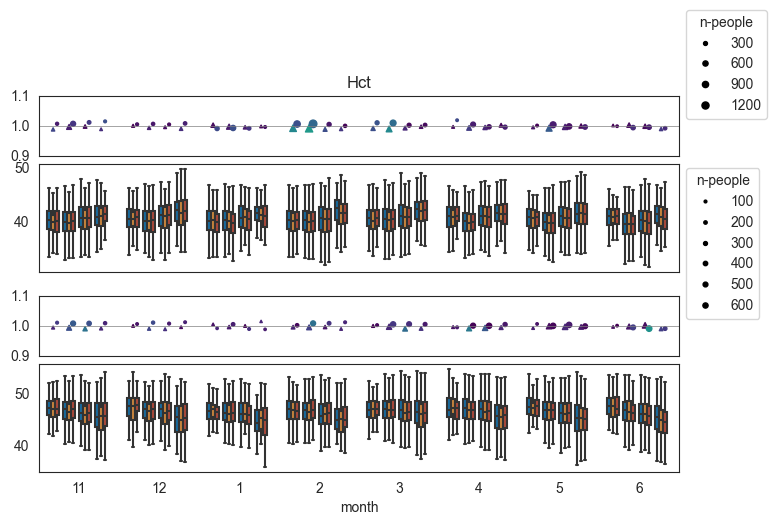

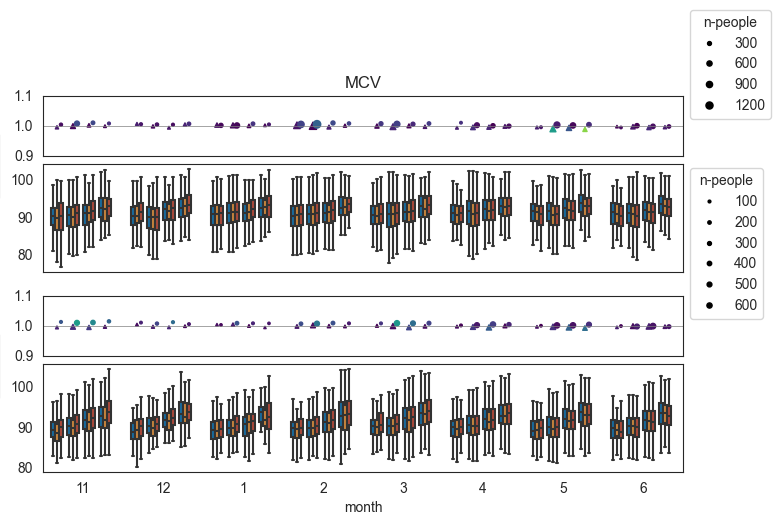

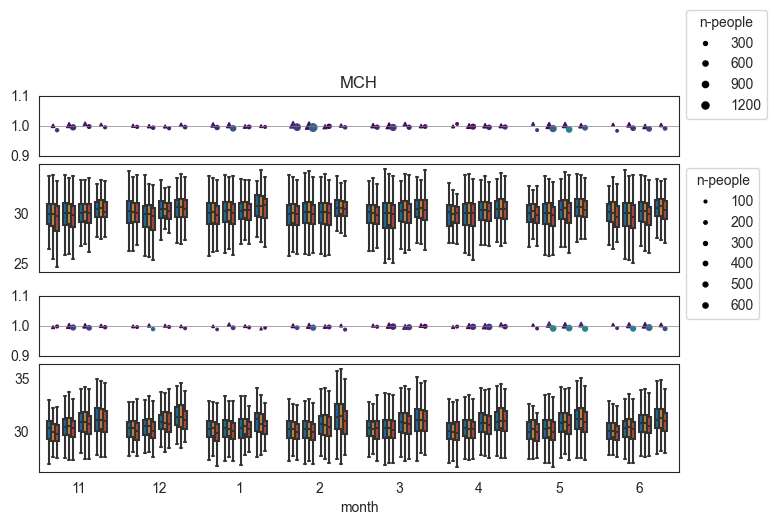

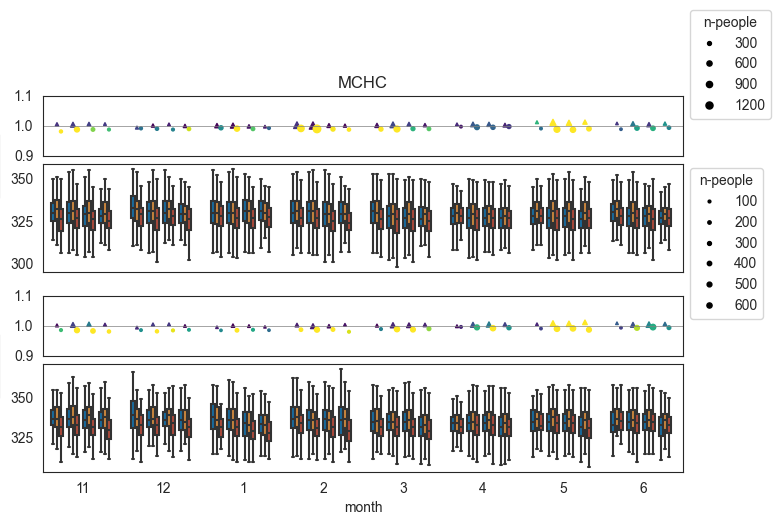

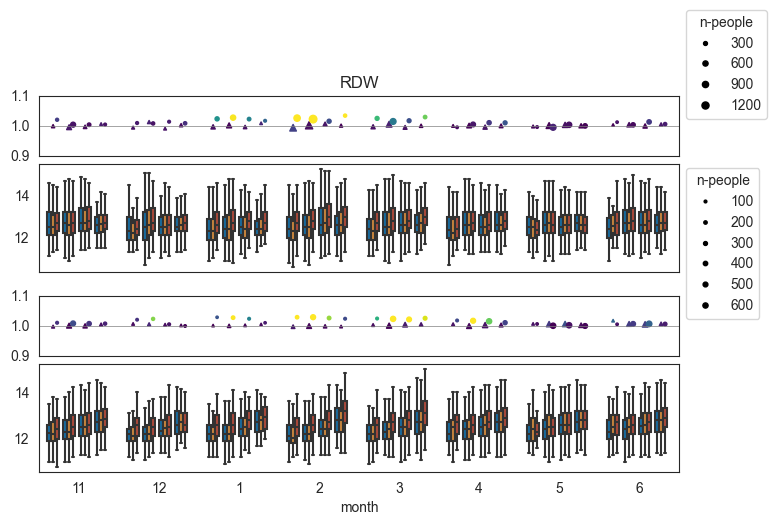

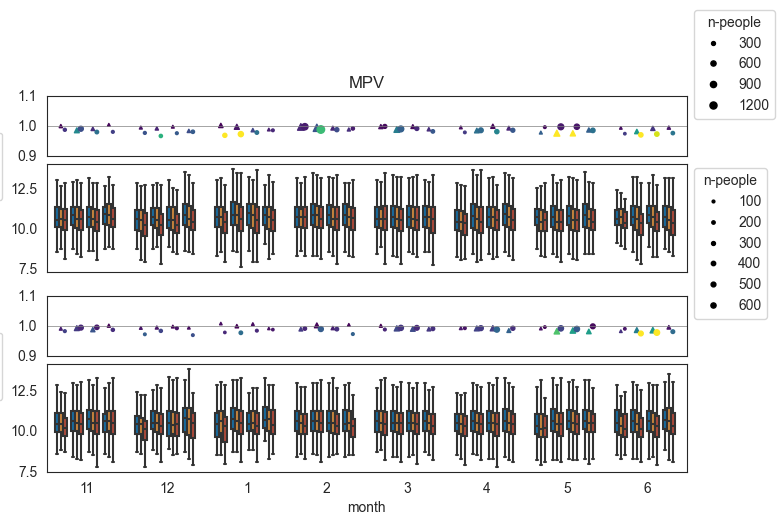

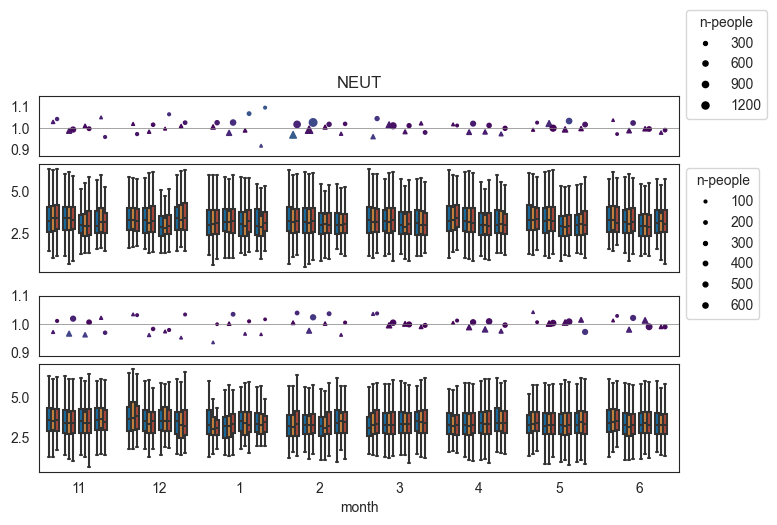

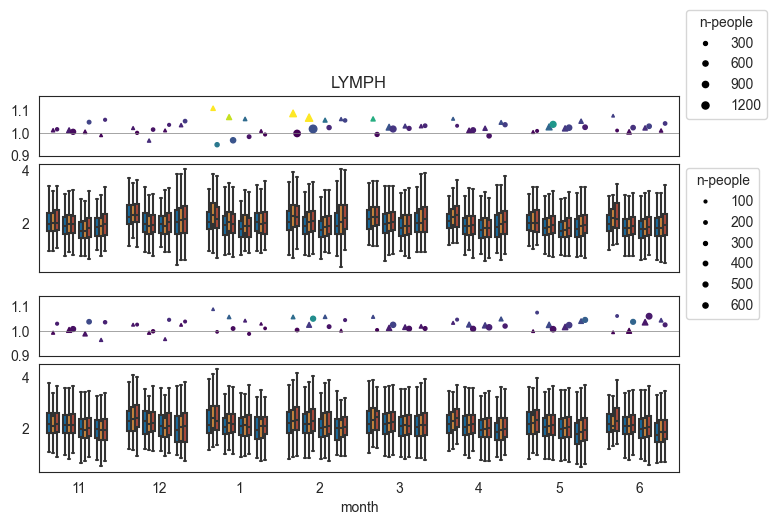

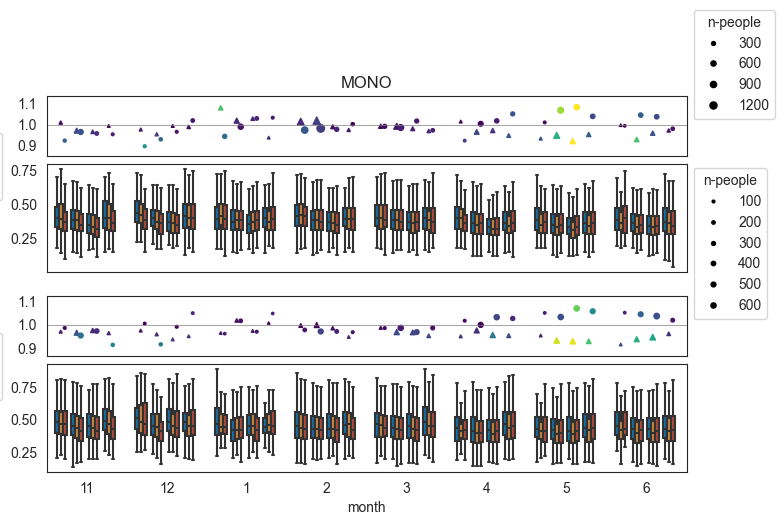

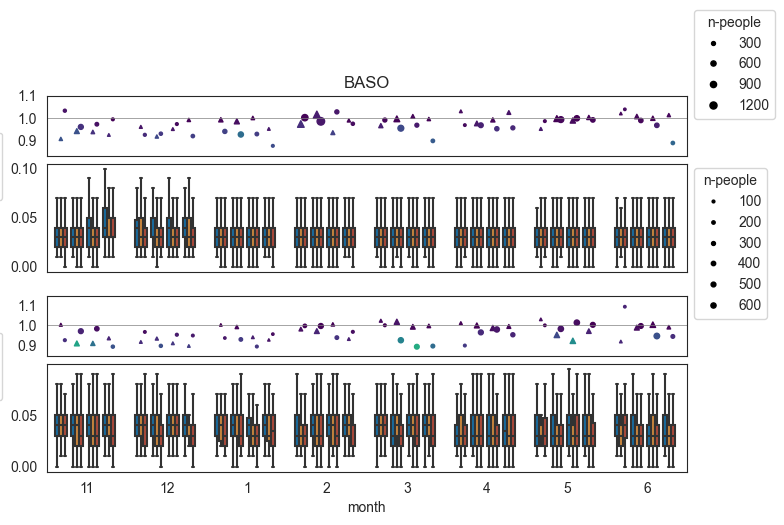

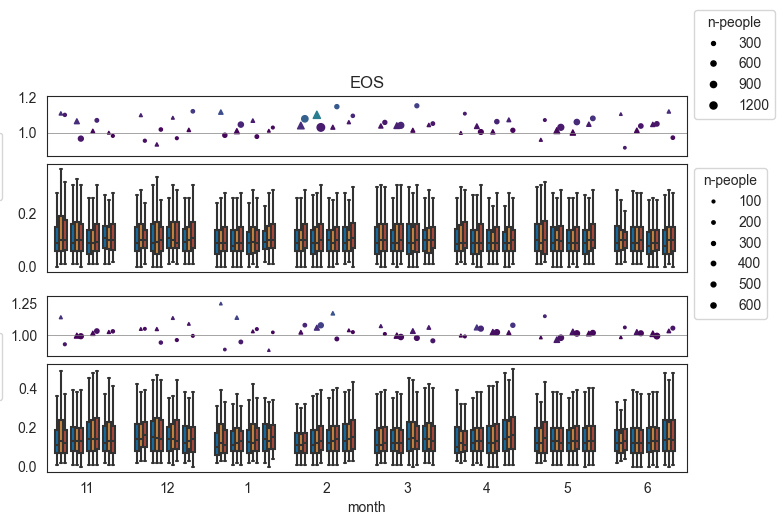

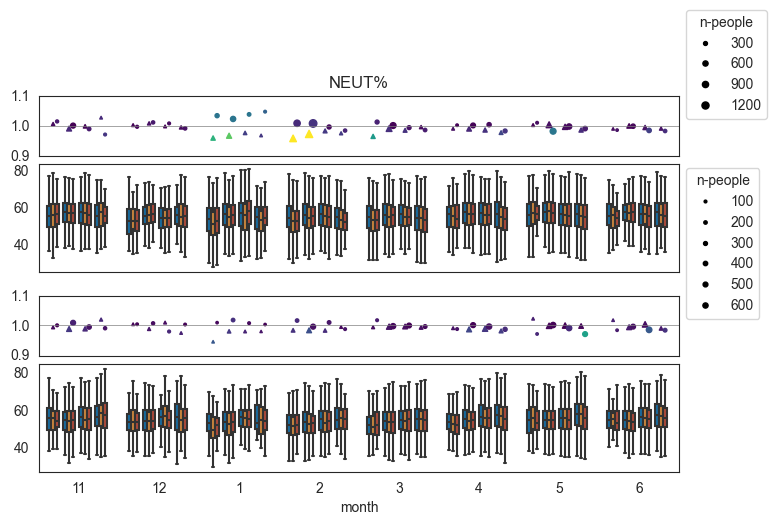

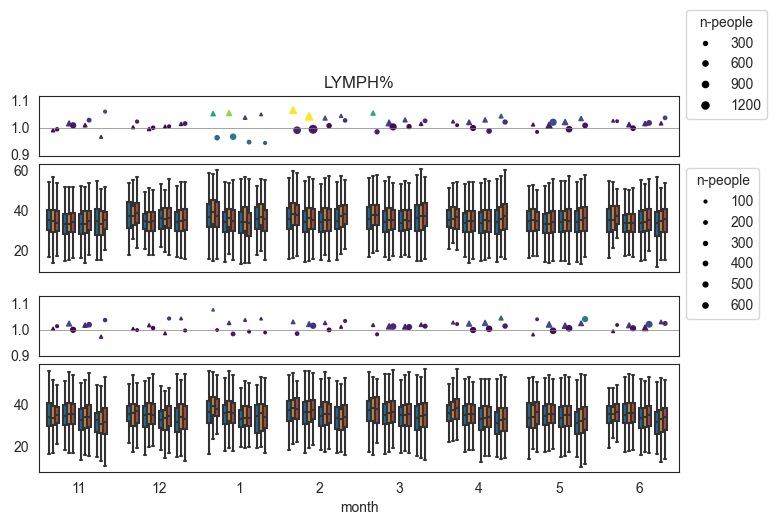

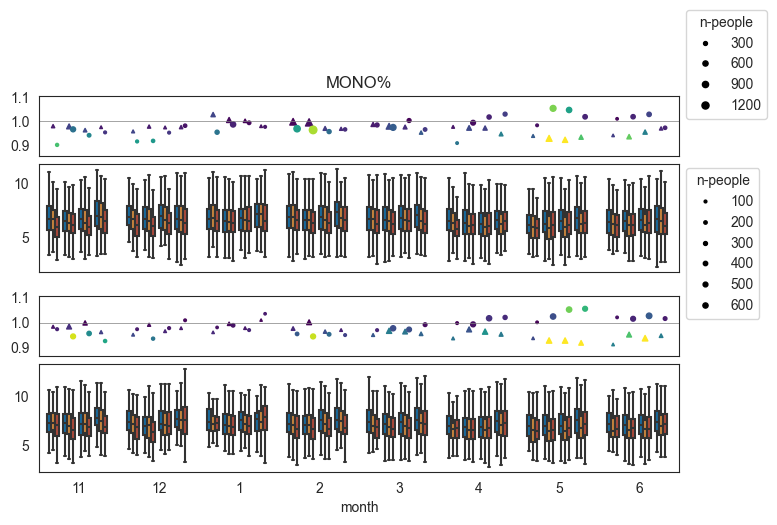

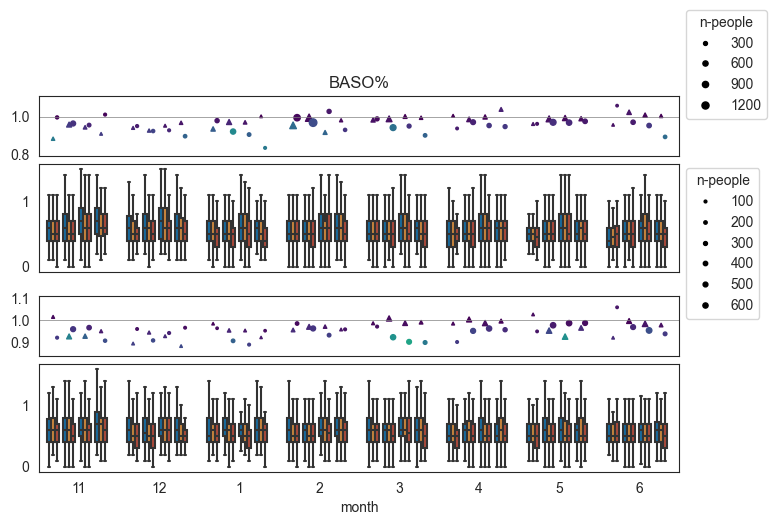

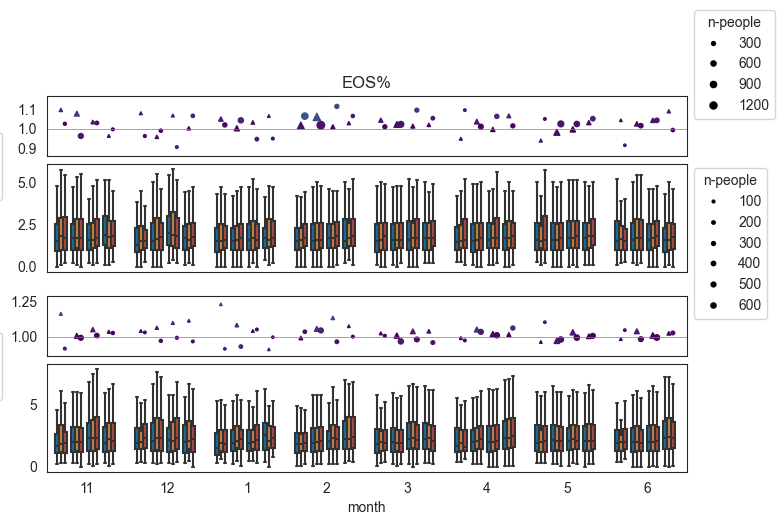

In [7]:
for tag in l_tags:
    fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
    )